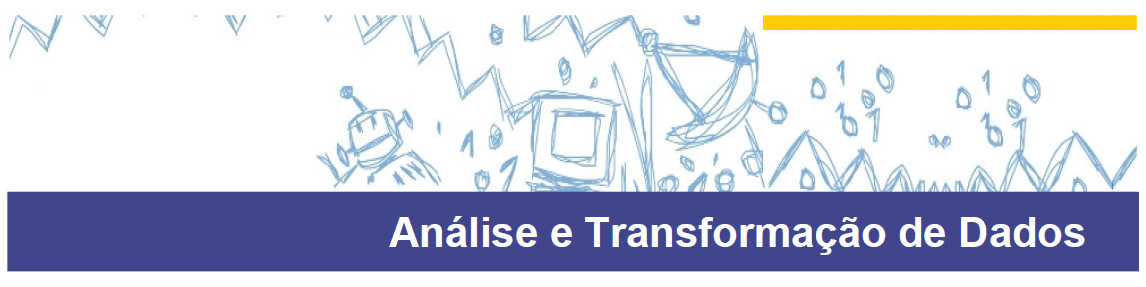
### Ficha Prática nº 5 de ATD 2022
Alberto Cardoso ©DEI2021/2022

Objetivo: Pretende-se analisar as propriedades de sistemas lineares e invariantes no tempo (SLITs) em tempo discreto, usando a Transformada de Z, e determinar e representar a sua resposta a determinados sinais de entrada e a sua resposta em frequência.

**Exercício 1.** Considerar o sistema (SLIT) caracterizado pela seguinte equação de diferenças:
$y[n]=b_0x[n]+b_1 x[n-1]+b_2 x[n-2]+b_3 x[n-3]+b_4 x[n-4]-a_1 y[n-1]-a_2 y[n-2]$,

em que: $b_0=0$, $b_1=0$, $b_2=0$, $b_3=0.3$, $b_4=-0.18$, $a_1=-1.5$, $a_2=0.56$

**Exercício 1.1** Determinar a expressão da função de transferência do sistema, $G(z)$.

In [1]:
%--- Ex 1.1
%plot inline -w 1200

b3=0.3;
b4=-0.18;
a1=-1.5;
a2=0.56;
b=[0 0 0 b3 b4]
a=[1 a1 a2 0 0]

syms z
disp('Função de transferência G(z):')
Gz=(b3*z^-3+b4*z^-4)/(1+a1*z^-1+a2*z^-2);
pretty(Gz)


b =

         0         0         0    0.3000   -0.1800


a =

    1.0000   -1.5000    0.5600         0         0

Função de transferência G(z):
   3       9
 ----- - -----
     3       4
 10 z    50 z
---------------
  14     3
----- - --- + 1
    2   2 z
25 z




**Exercício 1.2** Calcular os pólos e os zeros do sistema e apresentar a sua localização no plano $z$.

zeros:

zGz =

    0.6000

pólos:

pGz =

         0
         0
    0.8000
    0.7000




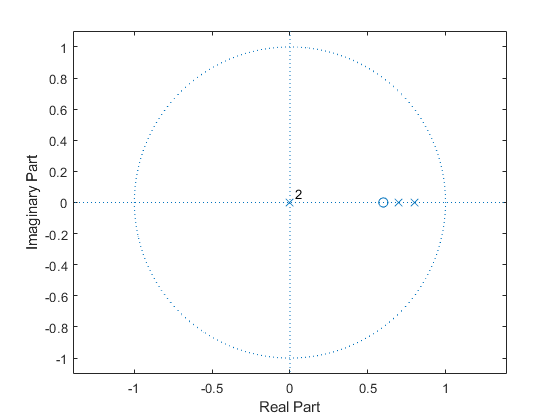

In [2]:
%--- Ex 1.2

disp('zeros:')
zGz=roots(b)
disp('pólos:')
pGz=roots(a)

figure(1)
zplane(b,a)

**Exercício 1.3** Verificar, justificadamente, a estabilidade do sistema.

In [3]:
%--- Ex 1.3

if all(abs(pGz)<1)
    disp('O sistema é estável');
else
    disp('O sistema é instável');
end

O sistema é estável



**Exercício 1.4** Obter o ganho do sistema em regime estacionário.

In [4]:
%--- Ex 1.4

disp('ganho do sistema:')
ddcgain(b,a)

ganho do sistema:

ans =

    2.0000




**Exercício 1.5** Determinar a expressão da resposta a impulso do sistema, $h[n]$, com condições iniciais nulas. Para determinar a expressão de $h[n]$, pode usar a função de cálculo simbólico *iztrans*, que recebendo a expressão de $H(z)$ obtém a expressão de $h[n]$ válida para $n≥0$, ou expandindo $H(z)$ em frações parciais (por exemplo com o apoio da função numérica *residuez*) e calculando $h[n]$ pela transformada inversa de $Z$ de cada parcela, sabendo que:
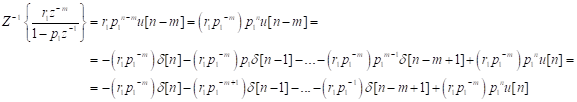



Expressão de h[n]:
 
hn =
 
(75*(4/5)^n)/64 - (9*kroneckerDelta(n - 2, 0))/28 - (255*kroneckerDelta(n - 1, 0))/784 - (300*(7/10)^n)/343 - (6525*kroneckerDelta(n, 0))/21952
 

r =

    0.6000
   -0.3000


p =

    0.8000
    0.7000


k =

     []

 
H2z_r =
 
3/(10*z^3*(7/(10*z) - 1)) - 3/(5*z^3*(4/(5*z) - 1))
 
 
h2n_r =
 
(75*(4/5)^n)/64 - (9*kroneckerDelta(n - 2, 0))/28 - (255*kroneckerDelta(n - 1, 0))/784 - (300*(7/10)^n)/343 - (6525*kroneckerDelta(n, 0))/21952
 



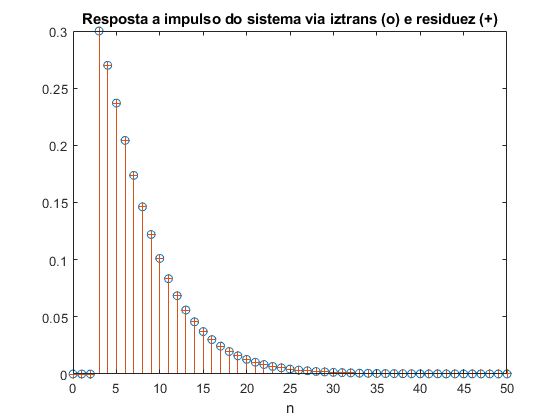

In [5]:
%--- Ex 1.5

disp('Expressão de h[n]:')
Hz=Gz;
hn=iztrans(Hz)
%pretty(hn);

[r,p,k]=residuez([b3 b4],[1 a1 a2])  % expansão em frações parciais sem o atraso puro

H2z_r=z^-3*(r(1)/(1-p(1)*z^-1))+z^-3*(r(2)/(1-p(2)*z^-1))
h2n_r=iztrans(H2z_r)
%pretty(h2n_r);
nv=[0:50];

syms n

figure(2)
stem(nv,double(subs(hn,n,nv)))
hold on 

stem(nv,double(subs(h2n_r,n,nv)),'+')
title('Resposta a impulso do sistema via iztrans (o) e residuez (+)');
xlabel('n');

**Exercício 1.6** Representar graficamente $h[n]$ para $0≤n≤50$, usando a função *stem*. Comparar o resultado com a saída do sistema obtida através da função *dimpulse*.

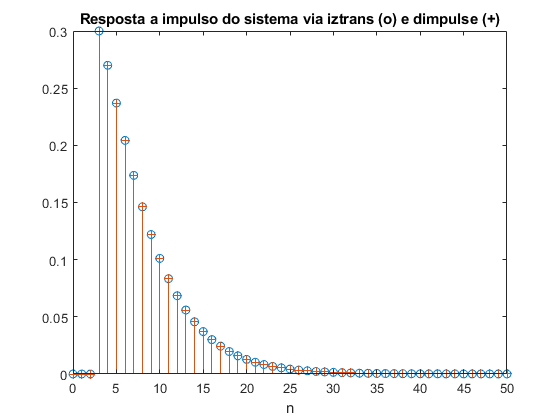

In [6]:
%--- Ex 1.6

n=0:50;
h=double(subs(hn));
h1=dimpulse(b,a,length(n));

figure(3)
stem(n,h,'o')
hold on
stem(n,h1,'+')
hold off
title('Resposta a impulso do sistema via iztrans (o) e dimpulse (+)');
xlabel('n');

**Exercício 1.7** Com base na resposta a impulso do sistema, $h[n]$, verificar se o sistema é estável e causal.

In [7]:
%--- Ex 1.7

S2=sum(abs(h))
disp(' O sistema é estável porque sum(h[n]) é finita');
disp(' O sistema é causal porque h[n]=0 para n<0');


S2 =

    1.9999

 O sistema é estável porque sum(h[n]) é finita
 O sistema é causal porque h[n]=0 para n<0



**Exercício 1.8** Determinar a expressão da resposta a degrau unitário do sistema, $y[n]$.

In [8]:
%--- Ex 1.8

syms n
sympref('HeavisideAtOrigin',1);
Xz=ztrans(heaviside(n))
disp('Transformada de z de x[n]:')
pretty(Xz)

Yz=Hz*Xz;
yn=iztrans(Yz);
disp('Expressão de y[n]:')
pretty(yn)

 
Xz =
 
1/(z - 1) + 1
 
Transformada de z de x[n]:
  1
----- + 1
z - 1

Expressão de y[n]:
                                / 4 \n       /  7 \n
                             75 | - |    100 | -- |
9 kroneckerDelta(n - 1, 0)      \ 5 /        \ 10 /    507 kroneckerDelta(n, 0)
-------------------------- - --------- + ----------- + ------------------------ + 2
            28                   16           49                  784




**Exercício 1.9** Representar graficamente $y[n]$ para $0≤n≤50$, usando a função *stairs*. Comparar o resultado com a saída do sistema obtida através da função *dstep*.

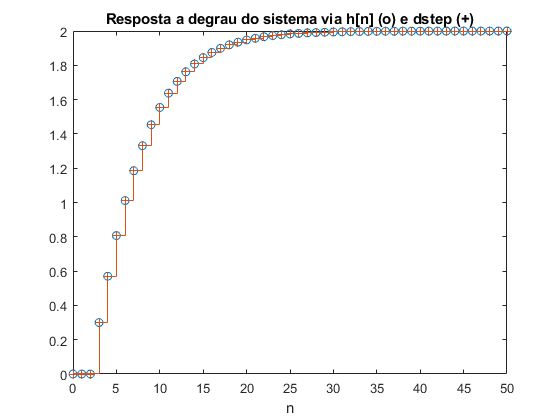

In [9]:
%--- Ex 1.9

nv=0:50;
y=double(subs(yn,n,nv));
y1=dstep(b,a,length(nv));

figure(4)
stairs(nv,y,'-o')
hold on
stairs(nv,y1,'-+')
hold off
title('Resposta a degrau do sistema via h[n] (o) e dstep (+)');
xlabel('n');

**Exercício 1.10** Aplicar o Teorema do Valor Final para determinar o valor de $\lim\limits_{n \to \infty} y[n]$ para a entrada em degrau unitário. Comparar com o valor do ganho do sistema em regime estacionário.

In [10]:
%--- Ex 1.10

disp('y[infinito]=')
yinf=double(limit((1-z^-1)*Yz,1))
yinf1=double(limit(yn,inf))
y(end)

y[infinito]=

yinf =

     2


yinf1 =

     2


ans =

    1.9999




**Exercício 1.11** Determinar e representar graficamente a resposta do sistema (usando, por exemplo, a função *dlsim*) à entrada $x[n]=3(u[n-2]-u[n-10])$ para $0≤n≤50$.

Transformada de z de x[n]:
 
Xz =
 
(3*(1/(z - 1) + 1))/z^2 - (3*(1/(z - 1) + 1))/z^10
 
  /   1       \     /   1       \
3 | ----- + 1 |   3 | ----- + 1 |
  \ z - 1     /     \ z - 1     /
--------------- - ---------------
        2                10
       z                z




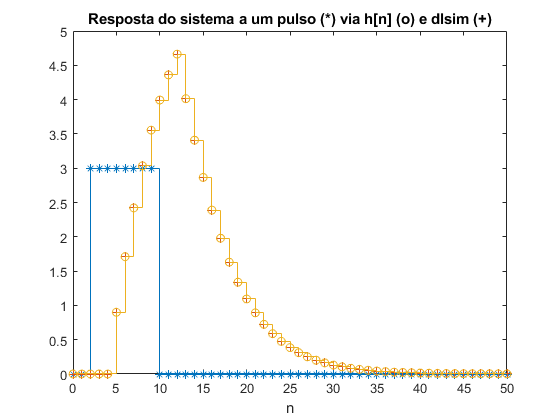

In [11]:
%--- Ex 1.11

syms n
xn=3*(heaviside(n-2)-heaviside(n-10));
disp('Transformada de z de x[n]:')
Xz=ztrans(xn)
pretty(Xz)

Yz=Hz*Xz;
yn=iztrans(Yz);

n=0:50;
y=double(subs(yn));
x=double(subs(xn));
y1=dlsim(b,a,x);

figure(5)
stairs(n,x,'-*');
hold on
stairs(n,y,'-+')
stairs(n,y1,'-o')
hold off
title('Resposta do sistema a um pulso (*) via h[n] (o) e dlsim (+)');
xlabel('n');

**Exercício 1.12** Obter e representar graficamente (amplitude em dB e fase em graus, recorrendo à função *unwrap* para evitar eventuais saltos na sequência de valores da fase) a resposta em frequência do sistema, $H(\Omega)$, para $\Omega$ entre $0$ e $\pi$ $rad$ (com 100 elementos). Os gráficos da amplitude, $|H(\Omega)|$, e da fase, $\angle H(\Omega)$, devem ser representados separadamente numa mesma figura, considerando a frequência normalizada. Comparar com a resposta em frequência do sistema, $H(\Omega)$, obtida com a função *freqz*.

Expressão de H(Omega):
 
HOmega =
 
((3*exp(-O*3i))/10 - (9*exp(-O*4i))/50)/(1 + (14*exp(-O*2i))/25 - (3*exp(-O*1i))/2)
 
   3 exp(-O 3i)   9 exp(-O 4i)
   ------------ - ------------
        10             50
--------------------------------
    14 exp(-O 2i)   3 exp(-O 1i)
1 + ------------- - ------------
          25              2




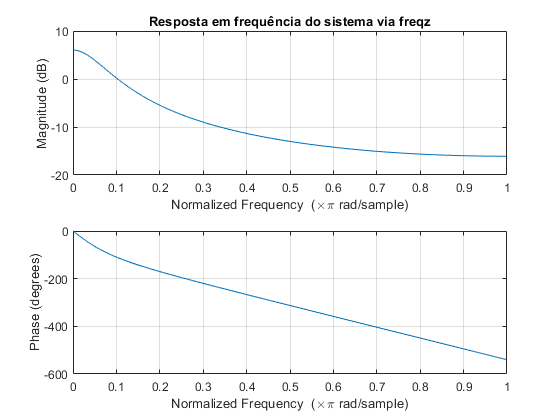

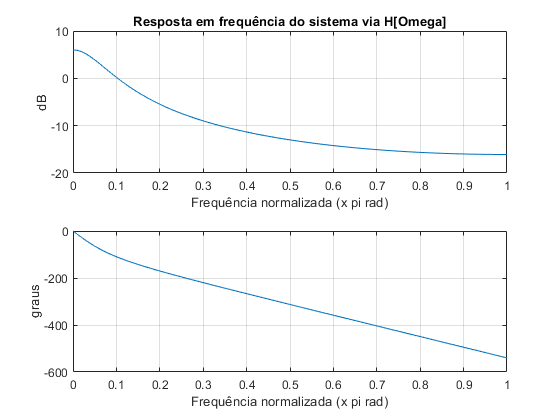

In [12]:
%--- Ex 1.12

syms O
disp('Expressão de H(Omega):')
HOmega=subs(Hz,z,exp(j*O))
pretty(HOmega)

O=linspace(0,pi,100);
HO_abs=double(subs(abs(HOmega)));
HO_ang=double(subs(angle(HOmega)));

figure(6)
subplot(211)
plot(O/pi,20*log10(HO_abs))
grid
ylabel('dB');
xlabel('Frequência normalizada (x pi rad)');
title('Resposta em frequência do sistema via H[Omega]')
subplot(212)
plot(O/pi,180*unwrap(HO_ang)/pi)
%plot(O/pi,180*HO_ang/pi)
grid
ylabel('graus')
xlabel('Frequência normalizada (x pi rad)');

figure(7)
freqz(b,a)
title('Resposta em frequência do sistema via freqz')

**Exercício 1.13** Determinar o valor de $H(0)$ e comparar com o valor do ganho do sistema em regime estacionário (pode usar a função *ddcgain*).

In [13]:
%--- Ex 1.13

disp('Valor de H(0):')
%HO_abs(1)
%HO_ang(1)
abs_H0=abs(double(subs(HOmega,0)))
ang_H0=angle(double(subs(HOmega,0)))

Valor de H(0):

abs_H0 =

     2


ang_H0 =

     0




**Exercício 1.14** Determinar e representar graficamente a resposta do sistema a uma entrada $x[n]=2 sin⁡[0.1\pi n]$ , com base em $H(\Omega)$, para $0≤n≤50$. Comparar o resultado com a saída do sistema obtida através da função *dlsim*.

Valor de H(0.1*pi):

HO_abs1 =

    1.0245


HO_abs1dB =

    0.2105


HO_ang1 =

   -1.9112


HO_ang1deg =

 -109.5018




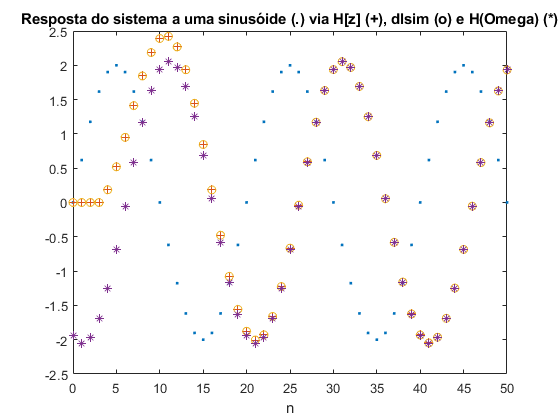

In [14]:
%--- Ex 1.14

%--------------Usando Z-----------------
syms n
xn=2*sin(0.1*pi*n);
Xz=ztrans(xn);
Yz=Hz*Xz;
yn=iztrans(Yz);

%--------------Usando dlsim-----------------
n=0:50;
x=double(subs(xn,n));
y=double(subs(yn));
y1=dlsim(b,a,x);

%--------------Usando H(Omega)-----------------
disp('Valor de H(0.1*pi):')
HO_abs1=double(subs(abs(HOmega),0.1*pi))
HO_abs1dB=20*log10(HO_abs1)
HO_ang1=double(subs(angle(HOmega),0.1*pi))
HO_ang1deg=180*HO_ang1/pi

y2=HO_abs1*2*sin(0.1*pi*n+HO_ang1);

figure(8)
stairs(n,x,'.');
hold on
stairs(n,y,'+')
stairs(n,y1,'o')
stairs(n,y2,'*')
hold off
title('Resposta do sistema a uma sinusóide (.) via H[z] (+), dlsim (o) e H(Omega) (*)');
xlabel('n');